In [21]:
from coffea.util import load
import hist
import numpy as np
import matplotlib.pyplot as plt

In [22]:
output = load("output.coffea")

In [23]:
sum_gw = {}
def get_sum_gw(smpl):
    if smpl not in sum_gw:
        N = 0
        for dataset in output['sum_genweights']:
            if smpl+"_" in dataset:
                N += output['sum_genweights'][dataset]
        sum_gw[smpl] = N
    return sum_gw[smpl]
ef = {"pt": {}, "eta": {}}
for cat in output["custom_info"]['nevents']:
    ef["pt"][cat] = {}
    for pt in output["custom_info"]['nevents'][cat]:
        ef["pt"][cat][pt] = {}
        ef["pt"][cat][pt]["total_mc"] = 0
        ef["pt"][cat][pt]["total_data"] = 0
        for smpl in output["custom_info"]['nevents'][cat][pt]:
            if not "DATA_" in smpl and not "Signal_" in smpl:
                ef["pt"][cat][pt][smpl] = output["custom_info"]['nevents'][cat][pt][smpl]/get_sum_gw(smpl)
                ef["pt"][cat][pt]["total_mc"] += ef["pt"][cat][pt][smpl]
            elif "DATA_" in smpl:
                ef["pt"][cat][pt][smpl] = output["custom_info"]['nevents'][cat][pt][smpl]
                ef["pt"][cat][pt]["total_data"] += ef["pt"][cat][pt][smpl]
for cat in output["custom_info"]['nevents_eta']:
    ef["eta"][cat] = {}
    for eta in output["custom_info"]['nevents_eta'][cat]:
        ef["eta"][cat][eta] = {}
        ef["eta"][cat][eta]["total_mc"] = 0
        ef["eta"][cat][eta]["total_data"] = 0
        for smpl in output["custom_info"]['nevents_eta'][cat][eta]:
            if not "DATA_" in smpl and not "Signal_" in smpl:
                ef["eta"][cat][eta][smpl] = output["custom_info"]['nevents_eta'][cat][eta][smpl]/get_sum_gw(smpl)
                ef["eta"][cat][eta]["total_mc"] += ef["eta"][cat][eta][smpl]
            elif "DATA_" in smpl:
                ef["eta"][cat][eta][smpl] = output["custom_info"]['nevents_eta'][cat][eta][smpl]
                ef["eta"][cat][eta]["total_data"] += ef["eta"][cat][eta][smpl]

In [24]:
EF = {"total_data": {}, "total_mc": {}}
EF_err = {"total_data": {}, "total_mc": {}}
EF_eta = {"total_data": {}, "total_mc": {}}
EF_eta_err = {"total_data": {}, "total_mc": {}}
for pt_interval in ef["pt"]["PLJ"]:
    for smpl in ["total_data", "total_mc"]:
        n_crb = ef["pt"]["CRB"][pt_interval][smpl]
        n_crc = ef["pt"]["CRC"][pt_interval][smpl]
        n_crd = ef["pt"]["CRD"][pt_interval][smpl]
        n_plj = ef["pt"]["PLJ"][pt_interval][smpl]
        EF[smpl][pt_interval] = ((n_crb*n_crc)/n_crd)/n_plj    
        EF_err[smpl][pt_interval] = EF[smpl][pt_interval] * np.sqrt(1/n_crb + 1/n_crc + 1/n_crd + 1/n_plj)            
    
for eta_interval in ef["eta"]["PLJ"]:
    for smpl in ["total_data", "total_mc"]:
        n_crb = ef["eta"]["CRB"][eta_interval][smpl]
        n_crc = ef["eta"]["CRC"][eta_interval][smpl]
        n_crd = ef["eta"]["CRD"][eta_interval][smpl]
        n_plj = ef["eta"]["PLJ"][eta_interval][smpl]
        EF_eta[smpl][eta_interval] = ((n_crb*n_crc)/n_crd)/n_plj    
        EF_eta_err[smpl][eta_interval] = EF_eta[smpl][eta_interval] * np.sqrt(1/n_crb + 1/n_crc + 1/n_crd + 1/n_plj)

In [25]:
EF

{'total_data': {'[60, 80]': 0.087890625,
  '[80, 100]': 0.08457963023254203,
  '[100, np.inf]': 0.07183673469387755},
 'total_mc': {'[60, 80]': 0.12690459189378928,
  '[80, 100]': 0.07032148857375418,
  '[100, np.inf]': 0.026342614392078967}}

In [26]:
EF_err

{'total_data': {'[60, 80]': 0.010348510292208455,
  '[80, 100]': 0.01419293444547702,
  '[100, np.inf]': 0.010811708242779647},
 'total_mc': {'[60, 80]': 0.02145216807606864,
  '[80, 100]': 0.02625016229430721,
  '[100, np.inf]': 0.009696976098052626}}

In [27]:
for cat in ef["pt"]:
    for pt in ef["pt"][cat]:
        print(cat, pt, ef["pt"][cat][pt]["total_data"])
        print(cat, pt, ef["pt"][cat][pt]["total_mc"])

PLJ [60, 80] 640
PLJ [60, 80] 370.7718158681779
PLJ [80, 100] 287
PLJ [80, 100] 185.25860882611624
PLJ [100, np.inf] 406
PLJ [100, np.inf] 178.24369133810936
CRB [60, 80] 108
CRB [60, 80] 51.02215778735696
CRB [80, 100] 55
CRB [80, 100] 8.390124498939583
CRB [100, np.inf] 64
CRB [100, np.inf] 8.301360896488676
CRC [60, 80] 500
CRC [60, 80] 306.14659707746006
CRC [80, 100] 222
CRC [80, 100] 172.96997394781317
CRC [100, np.inf] 319
CRC [100, np.inf] 165.98313714956475
CRD [60, 80] 960
CRD [60, 80] 331.97410384308387
CRD [80, 100] 503
CRD [80, 100] 111.39678872413141
CRD [100, np.inf] 700
CRD [100, np.inf] 293.45412684671567


In [28]:
EF_eta

{'total_data': {'[-1.5, -1]': 0.1087549699851875,
  '[-1, -0.5]': 0.06795844155844157,
  '[-0.5, 0]': 0.07370922533208758,
  '[0, 0.5]': 0.0546031746031746,
  '[0.5, 1]': 0.09560311284046692,
  '[1, 1.5]': 0.10898309705561614},
 'total_mc': {'[-1.5, -1]': 0.04711283356887566,
  '[-1, -0.5]': 0.1346829385801244,
  '[-0.5, 0]': 0.03310836610245951,
  '[0, 0.5]': 0.053263298500741414,
  '[0.5, 1]': 0.06487451907132863,
  '[1, 1.5]': 0.10803680562648126}}

In [29]:
EF_eta_err

{'total_data': {'[-1.5, -1]': 0.022582542953129305,
  '[-1, -0.5]': 0.014189293555478454,
  '[-0.5, 0]': 0.014399296005263209,
  '[0, 0.5]': 0.011570531896812179,
  '[0.5, 1]': 0.016808980816777962,
  '[1, 1.5]': 0.022740748916906018},
 'total_mc': {'[-1.5, -1]': 0.02322061426178016,
  '[-1, -0.5]': 0.031009447267594296,
  '[-0.5, 0]': 0.01788907101411521,
  '[0, 0.5]': 0.017897048584941525,
  '[0.5, 1]': 0.024973670491179836,
  '[1, 1.5]': 0.045492240989915236}}

In [8]:
output["nevents_eta"]

{'[-1.5, -1]': {'PLJ': 195, 'CRB': 34, 'CRC': 141, 'CRD': 192},
 '[-1, -0.5]': {'PLJ': 261, 'CRB': 44, 'CRC': 205, 'CRD': 262},
 '[-0.5, 0]': {'PLJ': 231, 'CRB': 40, 'CRC': 181, 'CRD': 311},
 '[0, 0.5]': {'PLJ': 220, 'CRB': 43, 'CRC': 149, 'CRD': 304},
 '[0.5, 1]': {'PLJ': 235, 'CRB': 62, 'CRC': 161, 'CRD': 314},
 '[1, 1.5]': {'PLJ': 182, 'CRB': 48, 'CRC': 121, 'CRD': 200}}

EF [0.087890625, 0.08457963023254203, 0.07183673469387755]
EF_err [0.010348510292208455, 0.01419293444547702, 0.010811708242779647]


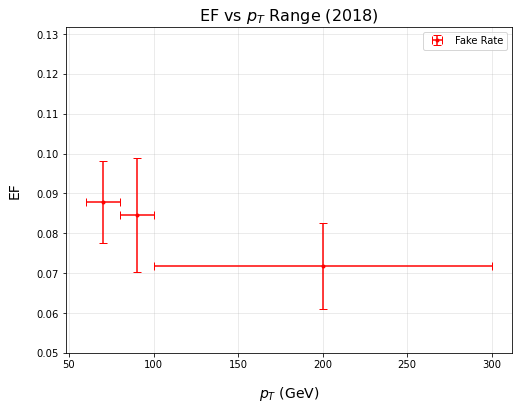

In [34]:
total_EF = []
total_EF_err = []

for pt in EF["total_data"].keys():
    total_EF.append(EF["total_data"][pt])
for pt in EF_err["total_data"].keys():
    total_EF_err.append(EF_err["total_data"][pt])

print ("EF", total_EF)
print("EF_err", total_EF_err)
pt = [70,90,200]
pt_err = [10,10,100]


# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6))  #
ax.errorbar(pt, total_EF, yerr=total_EF_err, xerr=pt_err, 
                fmt='.', color='red', label='Fake Rate', capsize=4)

ax.set_xlabel("$p_T$ (GeV)", fontsize=14, labelpad=15)  
ax.set_ylabel("EF", fontsize=14, labelpad=15)
ax.set_title("EF vs $p_T$ Range (2018)", fontsize=16)
plt.ylim(0.05, max(total_EF)*1.5)
ax.grid(alpha=0.3)
ax.legend()


#fig.tight_layout()
fig.savefig("FAKERATE_pt.png", bbox_inches="tight", pad_inches=0.2, facecolor="white")  
#plt.show()

EF [0.12804487179487178, 0.13190605714954226, 0.10077810720897537, 0.09579844497607656, 0.13527578262637213, 0.15956043956043955]
EF_err [0.02771232469892205, 0.02476658132984282, 0.019663175008106357, 0.018625876506606416, 0.02334447909935361, 0.03174904005864474]


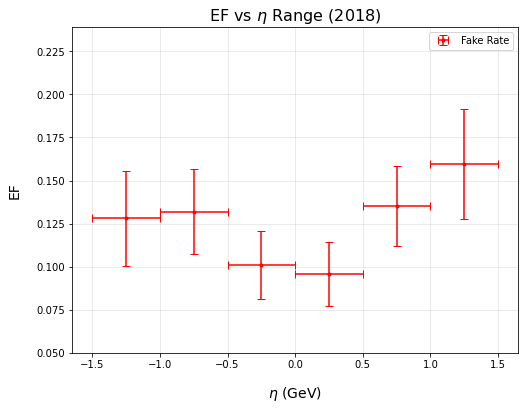

In [11]:
EF = []
EF_err = []

for eta in output["EF_eta"].keys():
    EF.append(output["EF_eta"][eta])
for eta in output["EF_eta_err"].keys():
    EF_err.append(output["EF_eta_err"][eta])

print ("EF", EF)
print("EF_err", EF_err)
eta = [-1.25,-0.75,-0.25,0.25,0.75,1.25]
eta_err = 0.25#,5,10,15,20,30,200]


# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6))  #
ax.errorbar(eta, EF, yerr=EF_err, xerr=eta_err, 
                fmt='.', color='red', label='Fake Rate', capsize=4)

ax.set_xlabel("$\eta$ (GeV)", fontsize=14, labelpad=15)  
ax.set_ylabel("EF", fontsize=14, labelpad=15)
plt.ylim(0.05, max(EF)*1.5)
ax.set_title("EF vs $\eta$ Range (2018)", fontsize=16)
ax.grid(alpha=0.3)
ax.legend()


#fig.tight_layout()
fig.savefig("FAKERATE_eta.png", bbox_inches="tight", pad_inches=0.2, facecolor="white")  
#plt.show()